# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

### 예제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [15]:
X, y = make_regression(n_samples=1000, # 생성할 데이터 개수
                       n_features=1,   # Feature의 개수
                       n_informative=1,# target(label)값에 영향을 주는 Feature의 개수
                       noise=30,       # noise(잡음) 값 추가. -> 모델이 찾을 수 없는 값. 범위로 지정: 0 ~ 지정한 값 중에 임의의 값을 사용.
                       random_state=0)
print(X.shape, y.shape)

(1000, 1) (1000,)


In [13]:
print(X[:5])
print(y[:5])

[[ 0.29673317]
 [-1.84306955]
 [ 0.9304085 ]
 [ 0.28912051]
 [ 0.35475769]]
[  24.38861542 -151.48260667   76.47063794   23.76292733   29.15767345]


> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

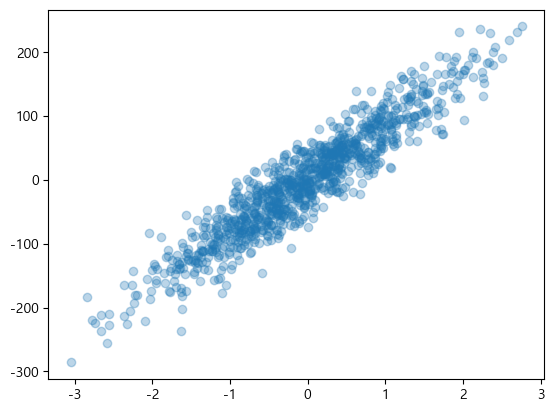

In [16]:
plt.scatter(X, y, alpha=0.3);

In [19]:
# y의 정보
print(y.mean(), np.median(y))
print(y.min(), y.max())

-2.9353214065211493 -3.859887443278972
-286.10570741064424 240.32028057363925


##### 모델 생성, 학습

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

##### 평가

In [22]:
X[:5]

array([[-2.55298982],
       [ 1.76405235],
       [-1.79132755],
       [-1.2140774 ],
       [-1.4449402 ]])

In [23]:
pred = lr.predict(X)
# pred

In [32]:
np.mean((y-pred)**2)

885.9735841406376

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y, pred) # (정답값, 예측값)
rmse = mean_squared_error(y, pred, squared=False)   # np.sqrt(mse)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)

print(f"MSE: {mse}, RMSE: {rmse}, RMSE2: {np.sqrt(mse)}\n R2: {r2}, MAE: {mae}")

MSE: 885.9735841406376, RMSE: 29.765308399891268, RMSE2: 29.765308399891268
 R2: 0.8808989693851077, MAE: 23.627771430275853


##### 교차검증 (cross validation)

In [35]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(LinearRegression(), 
                         X, y, cv=4,)# scoring='r2')  # scoring 생략 => 회귀: r2_score,  분류: accuracy
print(result)
print(result.mean())

[0.89476539 0.85829536 0.88648045 0.88280056]
0.8805854394305845


In [42]:
result = cross_val_score(LinearRegression(), 
                         X, y, cv=4,
                         #scoring='neg_mean_squared_error'
                         #scoring='neg_root_mean_squared_error'
                         scoring='neg_mean_absolute_error'
                        )
print(-result)
print(-result.mean())

[-21.98313529 -25.75860229 -23.54541203 -23.38231982]
-23.667367357979494


In [47]:
100 * X[3] + 20

array([-101.40774031])

##### 모델이 찾은 계수(coef, 가중치-weigth)와 절편(intercept, 편향-bias) 조회
- LinearRegression 모델은 선형 방정식을 이용해 예측값을 추론한다. 
- 학습이 끝나면 모델이 찾은 각 Feature에 곱해주는 계수와 절편을 다음 attribube로 조회할 수 있다.
    - coef_: Feature에 곱하는 가중치
    - intercept_: y절편. 모든 Feature가 0일때 예측값

In [49]:
lr.coef_  # feature마다 각각 다른값들을 찾는다. (feature가 5개 -> coef_도 5개)

array([82.01323352])

In [50]:
lr.intercept_

0.7763275132894489

In [51]:
lr.predict(X[:3])

array([-208.60262243,  145.45196451, -146.136237  ])

In [54]:
lr.coef_[0]  *  X[:3]  + lr.intercept_

array([[-208.60262243],
       [ 145.45196451],
       [-146.136237  ]])

##### X, y와 추론결과  시각화

In [58]:
X_sample = np.linspace(-3, 3, 100)
X_sample.shape
X_sample.reshape(-1, 1).shape


(100, 1)

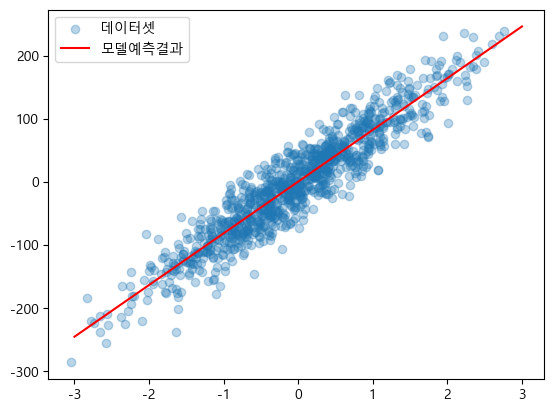

In [60]:
plt.scatter(X, y, alpha=0.3, label='데이터셋')
X_sample = np.linspace(-3, 3, 100)
y_sample = lr.predict(X_sample.reshape(-1, 1))
plt.plot(X_sample, y_sample, color='red', label='모델예측결과')
plt.legend()
plt.show()

In [70]:
%%writefile metrics.py

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score,
                             precision_score, f1_score, accuracy_score,
                             average_precision_score, roc_auc_score, 
                             mean_squared_error, mean_absolute_error, r2_score)

__version__ = 1.2

def print_metrics_regression(y, pred, title=None):
    """
    회귀 모델 평가결과들을 출력하는 함수
    MSE, RMSE, MAE, R2
    [parameter]
        y: ndarray - 정답(target)
        pred: ndarray - 모델이 추론한 값
        title: str=None - 제목
    """
    if title:
        print(title)
    mse = mean_squared_error(y, pred)
    rmse = mean_squared_error(y, pred, squared=False)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, r2: {r2:.3f}")

def plot_confusion_matrix(y, pred, title=None):
    """
    Confusion Matrix 시각화 함수
    [parameter]
        y: ndarray -  정답
        pred: ndarray -  모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, title=None):
    """
    classification(분류) 결과들을 출력하는 함수
    accuracy, recall, precision, f1-score
    [parameter]
        y: ndarray -  정답
        pred: ndarray -  모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    if title:
        print(title)
    print("정확도(accuracy):", accuracy_score(y, pred))
    print("재현율/민감도(recall):", recall_score(y, pred))
    print("정밀도(precision):", precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

def print_metrics_classification2(y, pred_pos_proba, title=None):
    """
    Average Precision Score와 roc-auc socre를 출력
    [parameter]
        y: ndarray - 정답의 label
        pred_pos_proba: ndarray - 모델이 추론한 positive(양성)의 확률
    """
    if title:
        print(title)
    print('Average Precision:', average_precision_score(y, pred_pos_proba))
    print('roc_auc:', roc_auc_score(y, pred_pos_proba))


Overwriting metrics.py


In [71]:
from metrics import print_metrics_regression as pmr
pmr(y, pred, "예제")

예제
MSE: 885.974, RMSE: 29.765, MAE: 23.628, r2: 0.881


## 기존 분류 모델의 회귀 모델

##### import

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from metrics import print_metrics_regression as pmr

from graphviz import Source

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# stratify=y  분류 데이터셋 분리때만 지정. (회귀에서는 지정하지 않는다.)
X_train.shape, X_test.shape

((800, 1), (200, 1))

##### 모델들 생성

In [78]:
knn = KNeighborsRegressor(n_neighbors=3)
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
rf = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0)
gb = GradientBoostingRegressor(n_estimators=200, max_depth=1, random_state=0)
lr = LinearRegression()
xgb = XGBRegressor(n_estimators=200, max_depth=1, random_state=0)
svr = SVR()

estimators = [
    ("knn", knn), 
    ("Decsion Tree", tree), 
    ("Random Forest", rf), 
    ("Gradient Boosting", gb), 
    ("Linear Regression", lr),
    ("XGBoost", xgb),
    ("SVM", svr)
]

##### 모델 학습 및 평가

In [79]:
for model_name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pmr(y_train, pred_train, f"{model_name} - Train set")
    pmr(y_test, pred_test, f"{model_name}-Test set-----------")
    print("="*100)

knn - Train set
MSE: 605.566, RMSE: 24.608, MAE: 19.608, r2: 0.921
knn-Test set-----------
MSE: 1241.497, RMSE: 35.235, MAE: 27.796, r2: 0.806
Decsion Tree - Train set
MSE: 999.747, RMSE: 31.619, MAE: 25.606, r2: 0.870
Decsion Tree-Test set-----------
MSE: 1057.638, RMSE: 32.521, MAE: 26.122, r2: 0.835
Random Forest - Train set
MSE: 871.589, RMSE: 29.523, MAE: 23.695, r2: 0.886
Random Forest-Test set-----------
MSE: 913.618, RMSE: 30.226, MAE: 24.430, r2: 0.857
Gradient Boosting - Train set
MSE: 808.368, RMSE: 28.432, MAE: 22.647, r2: 0.895
Gradient Boosting-Test set-----------
MSE: 876.818, RMSE: 29.611, MAE: 23.993, r2: 0.863
Linear Regression - Train set
MSE: 899.611, RMSE: 29.994, MAE: 23.768, r2: 0.883
Linear Regression-Test set-----------
MSE: 832.134, RMSE: 28.847, MAE: 23.048, r2: 0.870
XGBoost - Train set
MSE: 818.143, RMSE: 28.603, MAE: 22.827, r2: 0.893
XGBoost-Test set-----------
MSE: 891.954, RMSE: 29.866, MAE: 23.852, r2: 0.861
SVM - Train set
MSE: 2333.942, RMSE: 48.311,

##### Voting
- VotingRegressor 
    - 각 모델이 예측한 값의 평균을 출력한다.

In [82]:
estimators = [
    ("knn", knn), 
    ("Decsion Tree", tree), 
    ("Random Forest", rf), 
    ("Gradient Boosting", gb), 
    ("Linear Regression", lr),
    ("XGBoost", xgb),
]
voting = VotingRegressor(estimators)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                            ('Decsion Tree',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=0)),
                            ('Random Forest',
                             RandomForestRegressor(max_depth=3,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=200,
                                                       random_state=0)),
                            ('Linear Regression', LinearRegression(...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=1,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=0, ...))])

In [83]:
pred_train2 = voting.predict(X_train)
pred_test2 = voting.predict(X_test)
pmr(y_train, pred_train2)
print('---------------')
pmr(y_test, pred_test2)

MSE: 765.933, RMSE: 27.675, MAE: 22.224, r2: 0.900
---------------
MSE: 899.324, RMSE: 29.989, MAE: 24.172, r2: 0.860


In [ ]:
MSE: 819.976, RMSE: 28.635, MAE: 22.990, r2: 0.893
---------------
MSE: 906.920, RMSE: 30.115, MAE: 24.207, r2: 0.858

##### DecisionTreeRegressor Tree 시각화

In [86]:
y_train.mean()

-0.45799402682295465

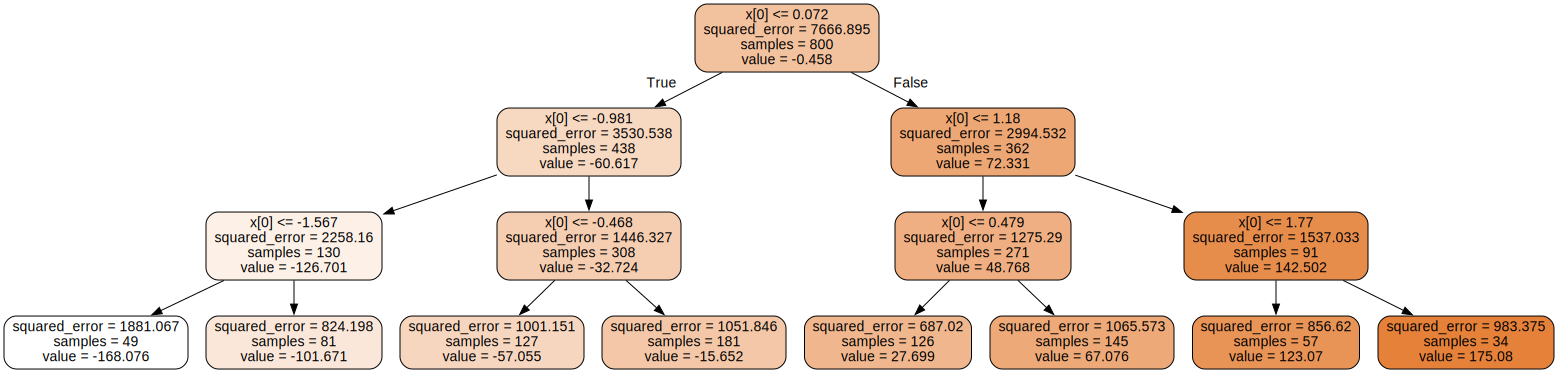

In [84]:
graph = Source(export_graphviz(tree, 
                               rounded=True, 
                               filled=True))
graph